In [1]:
import os
import cv2
import config
import argparse
import mimetypes
import imutils
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Argument parser
"""ap = argparse.ArgumentParser()
ap.add_argument('-i', '--input', required=True, help='path to input image/text file of image filenames')
args = vars(ap.parse_args())

filetype = mimetypes.guess_type(args['input'])[0]
imagePaths = [args['input']]"""
imagePath = 'dataset/train/000002_01_01_162.png'

# if the file type is a text file, then we need to process multiple images
"""if 'text/plain' == filetype:
    filenames = open(args['input']).read().strip().split('\n')
    imagePaths = []

    for f in filenames:
        p = os.path.sep.join([config.test_image, f])
        imagePaths.append(p)
"""
print("[INFO] loading object detector...")
model = load_model(config.model_detector)
print(imagePath)

"""for imagePath in imagePaths:
    print(imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)"""

image = load_img(imagePath, target_size=(224, 224))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)

# make bounding box predictions on the input image
pred = model.predict(image)[0]
(startX, startY, endX, endY) = pred

# load the input image
image = cv2.imread(imagePath)
image = imutils.resize(image, width=600)
(h, w) = image.shape[:2]

# scale the predicted bounding box coordinates based on the image dimensions
startX = int(startX * h)
startY = int(startY * w)
endX = int(endX * h)
endY = int(endY * w)

print(startX)
print(startY)
print(endX)
print(endY)

# draw the predicted bounding box on the image
im = cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
im = cv2.rectangle(im, (229, 256), (245, 273), (0, 255, 255), 2)

[INFO] loading object detector...
dataset/train/000002_01_01_162.png
240
234
307
290


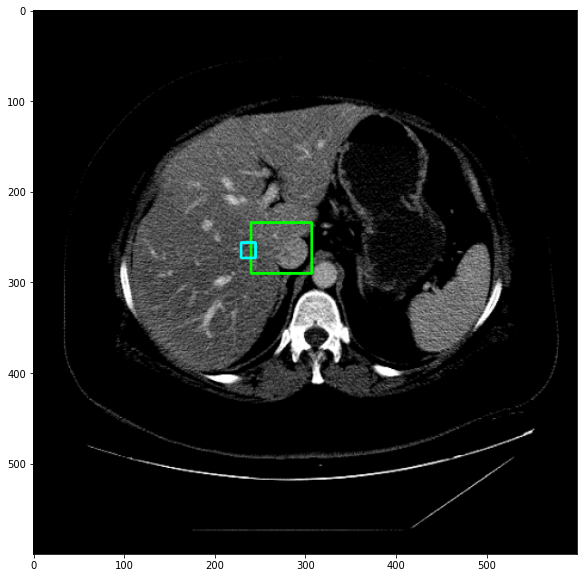

In [3]:
# show the outputs image
#cv2.imshow('Output', im)
#cv2.waitKey()
#cv2.destroyWindow('Output') #make sure window closes cleanly

#Show the image with matplotlib
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()